In [ ]:
!pip install --upgrade matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc, rcParams
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/pet_sales.csv')
df.head()

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,"$123,000",94.81,VC_1605,small,fish,7,1
1,4567,Toys,"$61,000",120.95,VC_1132,small,cat,10,0
2,4237,Toys,"$218,000",106.34,VC_802,small,hamster,6,0
3,4364,Snack,"$69,000",241.27,VC_929,large,dog,1,1
4,4184,Supplements,"$138,000",133.68,VC_749,large,dog,10,0


#### Validation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        879 non-null    int64  
 1   product_category  879 non-null    object 
 2   sales             879 non-null    object 
 3   price             879 non-null    float64
 4   vendor_id         879 non-null    object 
 5   pet_size          879 non-null    object 
 6   pet_type          879 non-null    object 
 7   rating            879 non-null    int64  
 8   re_buy            879 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 61.9+ KB


In [ ]:
df.describe()

,product_id,price,rating,re_buy
count,879.00000,879.000000,879.000000,879.000000
mean,4611.00000,128.212253,6.500569,0.466439
std,253.88974,71.923583,2.852835,0.499156
min,4172.00000,0.350000,1.000000,0.000000
25%,4391.50000,65.210000,5.000000,0.000000
50%,4611.00000,129.520000,6.000000,0.000000
75%,4830.50000,188.220000,10.000000,1.000000
max,5050.00000,252.690000,10.000000,1.000000


In [ ]:
no_null_values_exist = df.notnull().any()
print(f"----Column---- | ---No Null---\n{no_null_values_exist}")

----Column---- | ---No Null---
product_id          True
product_category    True
sales               True
price               True
vendor_id           True
pet_size            True
pet_type            True
rating              True
re_buy              True
dtype: bool


In [ ]:
# Product ID
df["product_id"] = df["product_id"].astype(str) # Should be character
n_unique_values_pid = df["product_id"].value_counts().sum()
print(f"Product ID type: {df.product_id.dtype}")
print(f"# of unique values = # sales records: {len(df)==n_unique_values_pid}")

Product ID type: object
# of unique values = # sales records: True


In [ ]:
# Product Category
prod_cat_str = df[["product_category"]].applymap(type).eq(str).all()
prod_cats = df["product_category"].unique()
print(f"all product categories are characters: {prod_cat_str[0]}")
print(f"product categories: {', '.join(prod_cats)}")
print(f"Number of categories: {len(prod_cats)}")

all product categories are characters: True
product categories: Equipment, Toys, Snack, Supplements, Bedding, Medicine, Housing, Food, Clothes, Accessory, Grooming
Number of categories: 11


In [ ]:
# Sales
df["sales"] = df["sales"].str.lstrip("$,") # stripping $
df["sales"] = df["sales"].str.replace(",", "") # removing ','
df["sales"] = df["sales"].astype(int)
sales_type = df["sales"].dtype
print(f"Type of sales column: {sales_type}")

Type of sales column: int64


In [ ]:
df.describe()

,sales,price,rating,re_buy
count,879.000000,879.000000,879.000000,879.000000
mean,116094.425484,128.212253,6.500569,0.466439
std,66297.297233,71.923583,2.852835,0.499156
min,3000.000000,0.350000,1.000000,0.000000
25%,60500.000000,65.210000,5.000000,0.000000
50%,116000.000000,129.520000,6.000000,0.000000
75%,177000.000000,188.220000,10.000000,1.000000
max,230000.000000,252.690000,10.000000,1.000000


In [ ]:
# Price
# Already a float

In [ ]:
# Vendor ID
df["vendor_id"] = df["vendor_id"].astype(str) # Should be character
n_unique_values_vid = df["vendor_id"].value_counts().sum()
vid_str = df["vendor_id"].apply(type).eq(str).all()
print(f"all Vendor IDs are characters: {vid_str}")
print(f"Vendor ID type: {df.vendor_id.dtype}")
print(f"# of unique values = # sales records: {len(df)==n_unique_values_vid}")

all Vendor IDs are characters: True
Vendor ID type: object
# of unique values = # sales records: True


In [ ]:
# Pet Size
pet_size_str = df["pet_size"].apply(type).eq(str).all()
pet_size_values = df["pet_size"].unique()
print(f"all pet sizes are characters: {pet_size_str}")
print(f"Categories of pet size: {', '.join(pet_size_values)}")

all pet sizes are characters: True
Categories of pet size: small, large, extra_small, medium, extra_large


In [ ]:
pet_type_str = df["pet_type"].apply(type).eq(str).all()
pet_type_values = df["pet_type"].unique()
print(f"all pet types are characters: {pet_type_str}")
print(f"Categories of pet type: {', '.join(pet_type_values)}")

all pet types are characters: True
Categories of pet type: fish, cat, hamster, dog, bird, rabbit


We are interested in "cat", "dog", "fish", and "bird". "rabbit" and "hamster" will be discarded

In [ ]:
# Rating
# Already an integer

In [ ]:
# Rebuy
df["re_buy"] = df["re_buy"].astype(bool) # transforming to bool
print("Successfully changed Rebuy column to bool.")

Successfully changed Rebuy column to bool.


In [ ]:
# Caculating number of sold items for each record
df["n_sold_items"] = (df["sales"]/df["price"]).astype(int)

#### Visualization

In [ ]:
# The 1st thing is to discard undesirable pet types
# namely: hamster and rabbit
before_len = len(df)
df = df[df["pet_type"].isin(["dog", "fish", "bird", "cat"])]
after_len = len(df)

print(f"""Sales for hamster and rabbit types were discarded; a total of
{before_len - after_len} sales record. The filtered dataset contains {after_len} sales record.""")

Sales for hamster and rabbit types were discarded; a total of
46 sales record. The filtered dataset contains 833 sales record.


In [ ]:
# setting matplotlib style
plt.style.use('seaborn-poster')
plt.style.use('default')
plt.style.use('ggplot')

<ipython-input-23-bc1e03ef4e93>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



###### 1st Question

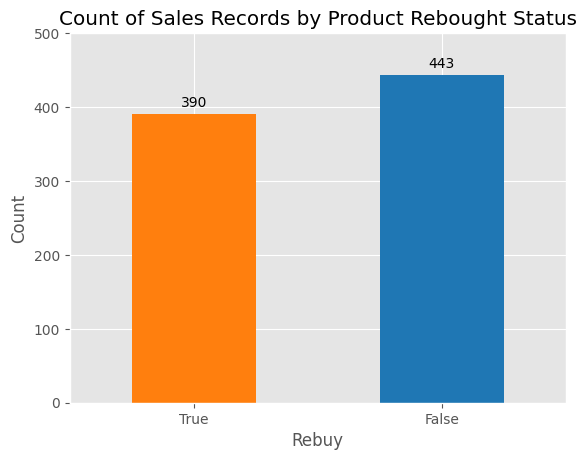

In [ ]:
fig, ax = plt.subplots()
ax = df["re_buy"].value_counts()\
            .sort_index(ascending=False)\
            .plot(kind="bar",
                  color=["#ff7f0e", "#1f77b4"],
                  yticks=range(0,501, 100),
                  sort_columns=False,
                  rot=0,
                  xlabel="Rebuy",
                  ylabel="Count")
# customizing
plt.title("Count of Sales Records by Product Rebought Status")
for bar in ax.containers:
    ax.bar_label(bar, padding=3)

plt.show()
fig.savefig("count_of_sales_records_by_product_rebuoght_status.png")

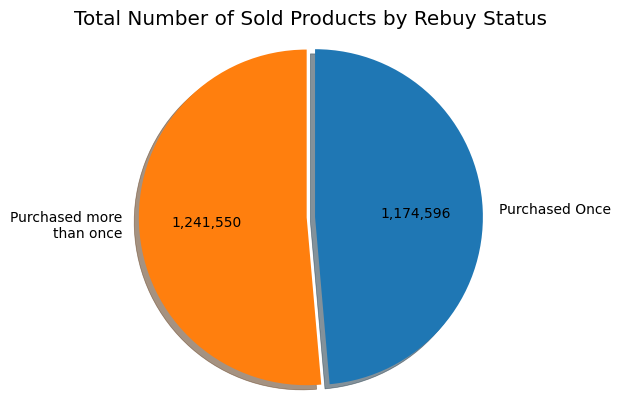

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Purchased more\nthan once', 'Purchased Once'
sizes = df.groupby("re_buy")["n_sold_items"].sum().sort_values(ascending=False)
explode = (0.05, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:,}'.format(v=val)
    return my_format


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct=autopct_format(sizes),
        shadow=True, startangle=90, colors=["#ff7f0e", "#1f77b4"])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Total Number of Sold Products by Rebuy Status")
plt.savefig("total_number_of_sold_products_by_rebuy_status.png")
plt.show()


###### 2nd Question

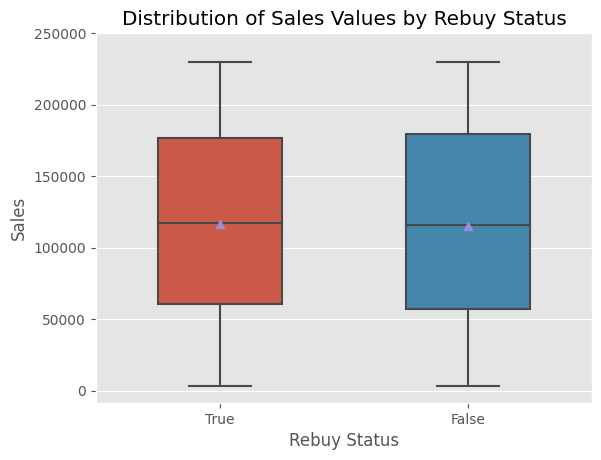

In [ ]:
ax = sns.boxplot(data=df,
            x='re_buy',
            y='sales',
            width=0.5,
            showmeans=True,
            order=[True, False])
# customizing
plt.xlabel('Rebuy Status')
plt.yticks(range(0, 250001, 50000))
plt.ylabel('Sales')
plt.title('Distribution of Sales Values by Rebuy Status')
plt.savefig("distribution_of_sales_values_by_rebuy_status.png", bbox_inches="tight")
plt.show()

In [ ]:
df[df["re_buy"]]["sales"].sum(), df[~df["re_buy"]]["sales"].sum()

(45587000, 51125000)

###### 3rd Question

In [ ]:
fig = px.sunburst(df[df["re_buy"]],
                  path=['product_category'],
                  color_continuous_scale='RdBu',
                  # color="sales",
                  title="Sales Records by Product")

# displaying percent values
fig.update_traces(textinfo="label+value")

# customizing
fig.update_layout(autosize=False,
                  height=650,
                  width=650)

fig.show()

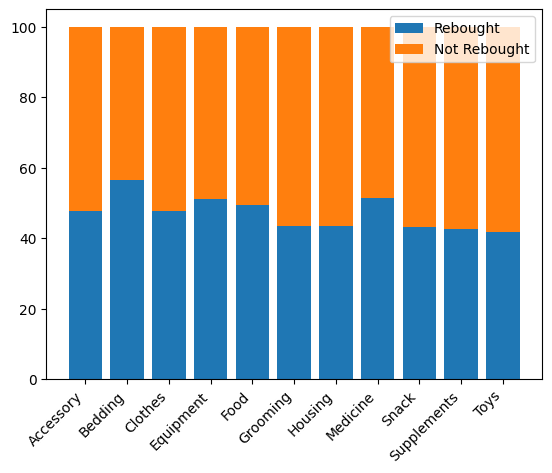

In [ ]:
plt.style.use('default')
prod_cat_sales = pd.pivot_table(data=df,
                                index="product_category",
                                columns="re_buy",
                                values="sales",
                                aggfunc=lambda x: len(x),
                                margins=True)
prod_cat_sales[False] = (prod_cat_sales[False] * 100 / prod_cat_sales["All"]).round(2)
prod_cat_sales[True] = (prod_cat_sales[True] * 100 / prod_cat_sales["All"]).round(2)

fig, ax = plt.subplots()

ax.bar(prod_cat_sales.index[:-1], prod_cat_sales[True].iloc[:-1], label="Rebought")
ax.bar(prod_cat_sales.index[:-1], prod_cat_sales[False].iloc[:-1], bottom=prod_cat_sales[True].iloc[:-1], label="Not Rebought")

plt.xticks(rotation=45, ha="right")
plt.legend()
plt.show()

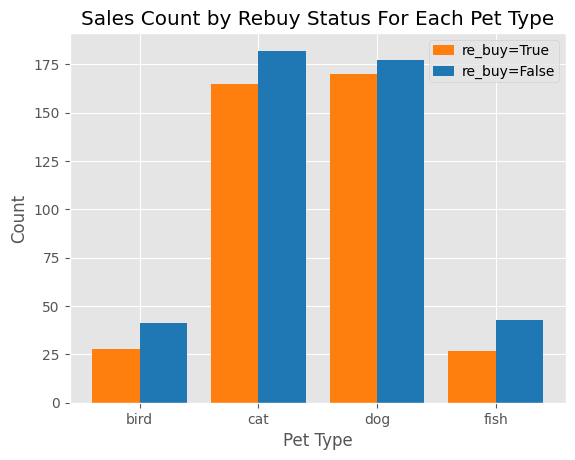

In [ ]:
# pivoting by rebuy status and pet type
sales_pettype = df.pivot_table(index="pet_type",
                               columns="re_buy",
                               values="product_id",
                               aggfunc=lambda x: len(x))

# plotting
fig, ax = plt.subplots()

plt.bar(x=np.arange(1,5)-0.2,
        height=sales_pettype[True],
        width=0.4,
        color="#ff7f0e",
        label="re_buy=True")
plt.bar(x=np.arange(1,5)+0.2,
        height=sales_pettype[False],
        width=0.4,
        color="#1f77b4",
        label="re_buy=False")

ax.set_xticks(np.arange(1,5), labels=['bird', 'cat', 'dog', 'fish'])
ax.set_xlabel("Pet Type")
ax.set_ylabel("Count")
ax.set_title("Sales Count by Rebuy Status For Each Pet Type")
plt.legend(loc="upper right",
           borderpad=0.25,
           handlelength=1.5,
           handletextpad=0.6)
plt.show()

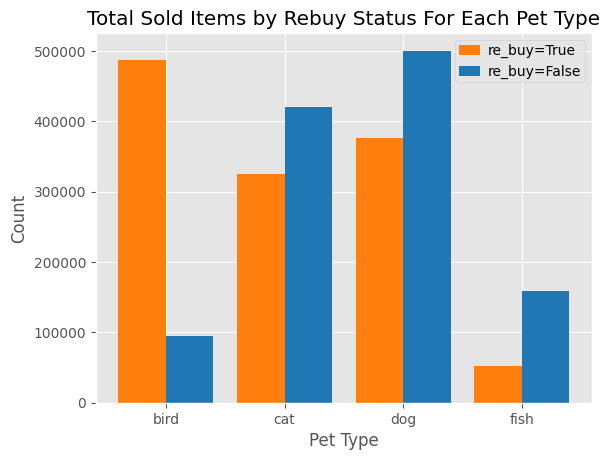

In [ ]:
# pivoting by rebuy status and pet type
sales_pettype = df.pivot_table(index="pet_type",
                               columns="re_buy",
                               values="n_sold_items",
                               aggfunc=np.sum)

# plotting
fig, ax = plt.subplots()

plt.bar(x=np.arange(1,5)-0.2,
        height=sales_pettype[True],
        width=0.4,
        color="#ff7f0e",
        label="re_buy=True")
plt.bar(x=np.arange(1,5)+0.2,
        height=sales_pettype[False],
        width=0.4,
        color="#1f77b4",
        label="re_buy=False")

ax.set_xticks(np.arange(1,5), labels=['bird', 'cat', 'dog', 'fish'])
ax.set_xlabel("Pet Type")
ax.set_ylabel("Count")
ax.set_title("Total Sold Items by Rebuy Status For Each Pet Type")
plt.legend(loc="upper right",
           borderpad=0.25,
           handlelength=1.5,
           handletextpad=0.6)
plt.savefig("total_sold_items_by_rebuy_status_for_each_pet_type.png", bbox_inches="tight")
plt.show()

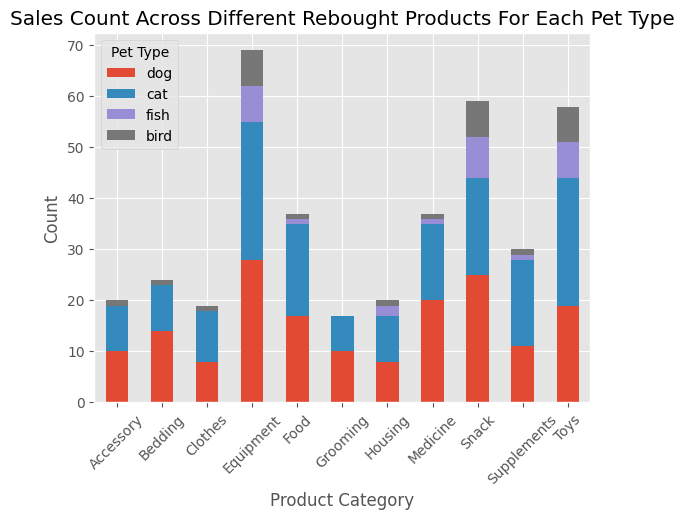

In [ ]:
# pivoting by pet_type and product_category
stacked_df = df[df["re_buy"]].pivot_table(columns="pet_type",
                                          index="product_category",
                                          values="product_id",
                                          aggfunc=lambda x: len(x))

# rearrangin columns
stacked_df = stacked_df[["dog", "cat", "fish", "bird"]]

# plotting
ax = stacked_df.plot(kind="bar", stacked=True, rot=45)

# customizing
ax.set_ylabel("Count")
ax.set_xlabel("Product Category")
plt.legend(title="Pet Type")
plt.title("Sales Count Across Different Rebought Products For Each Pet Type")

plt.show()

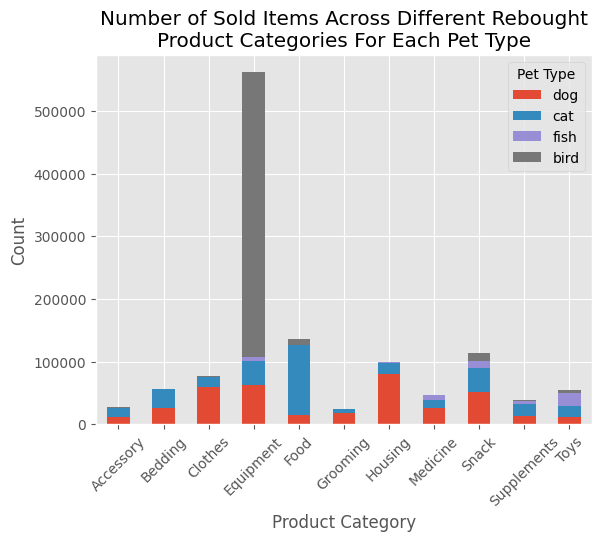

In [ ]:
# pivoting by pet_type and product_category
stacked_df = df[df["re_buy"]].pivot_table(columns="pet_type",
                                          index="product_category",
                                          values="n_sold_items",
                                          aggfunc=np.sum)

# rearrangin columns
stacked_df = stacked_df[["dog", "cat", "fish", "bird"]]

# plotting
ax = stacked_df.plot(kind="bar", stacked=True, rot=45)

# customizing
ax.set_ylabel("Count")
ax.set_xlabel("Product Category")
plt.legend(title="Pet Type")
plt.title("Number of Sold Items Across Different Rebought\nProduct Categories For Each Pet Type")
plt.savefig("number_of_sold_items_across_different_rebought_product_categories_for_each_pet_type.png", bbox_inches="tight")
plt.show()

In [ ]:
fig = px.sunburst(df[df["re_buy"]],
                  path=['pet_type', 'product_category'],
                  color_continuous_scale='RdBu',
                  color="n_sold_items",
                  title="Rating and Percentage of Sales Records by Pet type and Product")

# displaying percent values
fig.update_traces(textinfo="label+value")

# customizing
fig.update_layout(autosize=False,
                  height=650,
                  width=650)

fig.show()